## COMM7330 Exploratory Data Visualization Assignment
- Name: ZHU Rui    
- ID: 19451458
- __TOPIC : The correlation between the use of Internet and mental health condition__.

---
## 0. what is mental health?
According to MentalHealth.gov, ‘Mental health includes our emotional, psychological, and social well-being. It affects how we think, feel, and act.’ A positive mental health allows people to have a positive view of oneself and the world.

Over the pass decades, here has been increasing concerns in academia and government over the effects, especially negative ones, of the use of internet on individuals’ mental health. And relative topics have attracted plenty of media coverage. To see whether such concerns are reasonably grounded, exploring the correlation between Internet use and mental health condition is imperative. 

---
## 1 Dataset
### 1.1  Dataset Preparation
I got my dataset from “Our World in Data”. 

The first dataset is ‘Mental health disorders as a share of total disease burden ’ (https://ourworldindata.org/grapher/mental-health-share-of-total-disease-burden?tab=chart&time=1990..2016) . Here, the mental health conditions in different  countries and different years are presented by the mental health disorders’ share in disease burden which is measured in DALYs (Disability-Adjusted Life Years) .

The second dataset is the share of individuals using the Internet. (https://ourworldindata.org/internet). This dataset shows the use of internet in different  countries and different years by calculating the share of individuals who have used the internet(vie all channels) in each country in the last 3 months before conducting the survey each year.

__The combination of  these two datasets is a dataset contains both the internet use data and mental health condition data of different countries in different years__.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# combine two csv files
internet_use = pd.read_csv('data/share-of-individuals-using-the-internet.csv',encoding='utf-8')
mental_health = pd.read_csv('data/mental-health-share-of-total-disease-burden.csv',encoding='utf-8')

data = pd.merge(internet_use, mental_health, how = 'inner')

data.to_csv('data/combined_data.csv',index = False,  encoding='utf-8')


In [26]:
dataset = pd.read_csv('combined_data.csv')

# rename the columns
dataset.columns = ['Country', 'Code','Year','Internet Use(%)','DALYs-Mental Health Disorder(%)']

dataset.head(10)

,Country,Code,Year,Internet Use(%),DALYs-Mental Health Disorder(%)
0,Afghanistan,AFG,1990,0.000000,1.702507
1,Afghanistan,AFG,2001,0.004723,1.963988
2,Afghanistan,AFG,2002,0.004561,2.053607
3,Afghanistan,AFG,2003,0.087891,2.132441
4,Afghanistan,AFG,2004,0.105809,2.208840
5,Afghanistan,AFG,2005,1.224148,2.268055
6,Afghanistan,AFG,2006,2.107124,2.323056
7,Afghanistan,AFG,2007,1.900000,2.397723
8,Afghanistan,AFG,2008,1.840000,2.507534
9,Afghanistan,AFG,2009,3.550000,2.601437


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4531 entries, 0 to 4530
Data columns (total 5 columns):
Country                            4531 non-null object
Code                               4456 non-null object
Year                               4531 non-null int64
Internet Use(%)                    4531 non-null float64
DALYs-Mental Health Disorder(%)    4531 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 177.1+ KB


In [28]:
# the count of 'Code' 4456 is smaller than 'RangeIndex' 4531, means that some rows lack 'Code' value

# for rows don't have 'Code' value, assign 'Unknown' as its value
for i in range(4531):
    if dataset.loc[i,'Country']=='South Asia' or dataset.loc[i,'Country']=='Sub-Saharan Africa'or dataset.loc[i,'Country']=='North America':
        dataset.loc[i,'Code'] = 'Unknown'
        
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4531 entries, 0 to 4530
Data columns (total 5 columns):
Country                            4531 non-null object
Code                               4531 non-null object
Year                               4531 non-null int64
Internet Use(%)                    4531 non-null float64
DALYs-Mental Health Disorder(%)    4531 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 177.1+ KB


---
## 1.1 Dataset Analysis

### 1.1.1 Dataset Structure & Data type
- __5 variables/columns__
    - Country - object 
        - discrete & unordered & nominal
    - Code - object
        - discrete & unordered & nominal
    - Year - integer
        - discrete & ordered & nominal
    - Internet use(%) - float
        - continuous & ordered & ratio
    - DALYS-Mental Health Disorder(%) - float
        - continuous & ordered & ratio
- __4531 rows/cases__

### 1.1.2 Statistical Properties of Data

- __the minimum and maximum value__ of Internet use and mental health disorder

In [29]:
Min_values = dataset[['Internet Use(%)','DALYs-Mental Health Disorder(%)']].min()
Max_values = dataset[['Internet Use(%)','DALYs-Mental Health Disorder(%)']].max()

print('Min:', '\n', Min_values, '\n' , '\n' , 'Max:' , '\n' , Max_values)

Min: 
 Internet Use(%)                    0.000000
DALYs-Mental Health Disorder(%)    0.886586
dtype: float64 
 
 Max: 
 Internet Use(%)                    98.323610
DALYs-Mental Health Disorder(%)    12.881981
dtype: float64


- __the average values__ of each year's Internet use and mental health disorder

In [30]:
Year_mean = dataset.groupby(by='Year')[['Internet Use(%)','DALYs-Mental Health Disorder(%)']].mean()
print(Year_mean.head()) # show the first 5 rows

      Internet Use(%)  DALYs-Mental Health Disorder(%)
Year                                                  
1990         0.030026                         4.234667
1991         0.313562                         6.084844
1992         0.414928                         6.061870
1993         0.480396                         5.712825
1994         0.697929                         5.391655


- the __maximun, minimun and average__ values of each country 

In [31]:
Country_mean = dataset.groupby(by='Country')[['Internet Use(%)','DALYs-Mental Health Disorder(%)']].mean()
Country_min = dataset.groupby(by='Country')[['Internet Use(%)','DALYs-Mental Health Disorder(%)']].min()
Country_max = dataset.groupby(by='Country')[['Internet Use(%)','DALYs-Mental Health Disorder(%)']].max()


In [32]:
print('Each country\'s MAX values from 1990 to 2016:' + '\n')
print(Country_max.head())

Each country's MAX values from 1990 to 2016:

                Internet Use(%)  DALYs-Mental Health Disorder(%)
Country                                                         
Afghanistan           10.595726                         3.099654
Albania               66.363445                         5.594142
Algeria               42.945527                         7.849771
American Samoa         0.000000                         4.883335
Andorra               97.930637                         8.734632


In [33]:
print('Each country\'s MIN values from 1990 to 2016:' + '\n')
print(Country_min.head())

Each country's MIN values from 1990 to 2016:

                Internet Use(%)  DALYs-Mental Health Disorder(%)
Country                                                         
Afghanistan                 0.0                         1.702507
Albania                     0.0                         4.439417
Algeria                     0.0                         4.918433
American Samoa              0.0                         4.883335
Andorra                     0.0                         8.047143


In [34]:
print('Each country\'s Average values from 1990 to 2016: '+'\n')
print(Country_mean.head())

Each country's Average values from 1990 to 2016: 

                Internet Use(%)  DALYs-Mental Health Disorder(%)
Country                                                         
Afghanistan            3.354972                         2.519032
Albania               21.555784                         5.354618
Algeria                9.692493                         6.659170
American Samoa         0.000000                         4.883335
Andorra               48.592382                         8.427845


---
## 2. ''EDVA''

### 2.1 Questions in mind.

Before starting the journey of data exploration, specific questions should be put to preform as the beacon, in case being lost in the ocean of data. 

Here __the question__ is whether there is a correlation between mental health disorder and Internet use.



### 2.2 Exploration and Visualization

#### 2.2.1 the correlation between mental health disorder and Internet use

#### 1. take the world as a whole to see the __changing trends of value-distributions__ of these two variable.
- plot type: histogram
- sample : 1990, 1995, 2000, 2005, 2010, 2015


    
--------------------1990----------------------

    


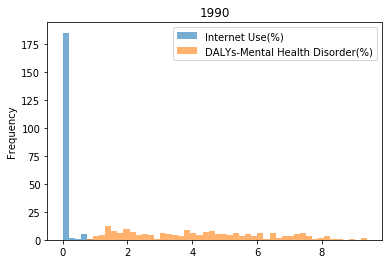

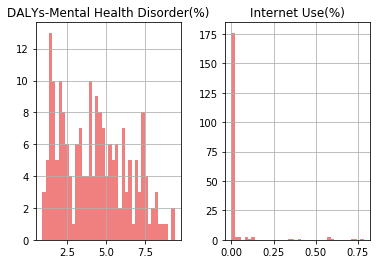


    
--------------------1995----------------------

    


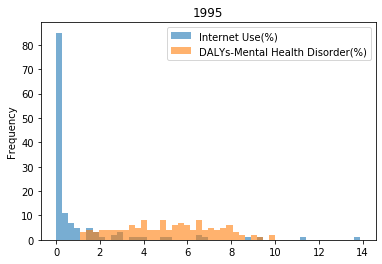

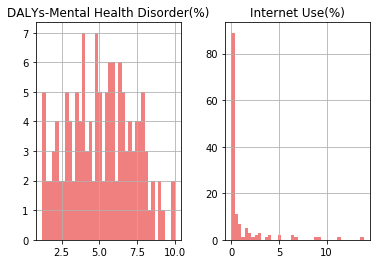


    
--------------------2000----------------------

    


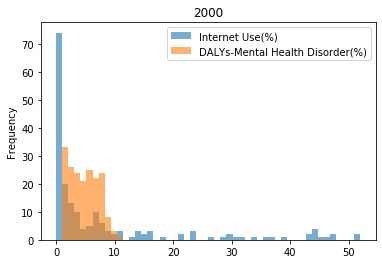

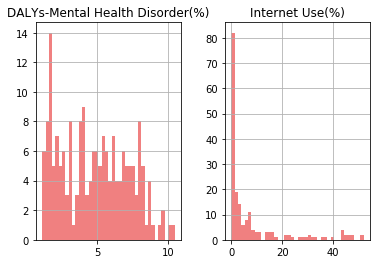


    
--------------------2005----------------------

    


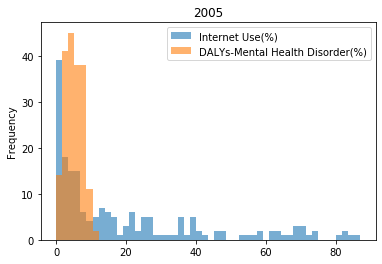

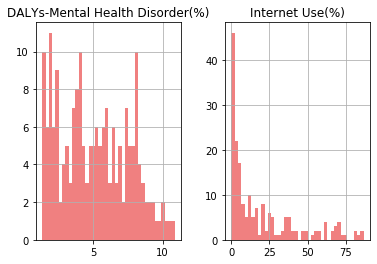


    
--------------------2010----------------------

    


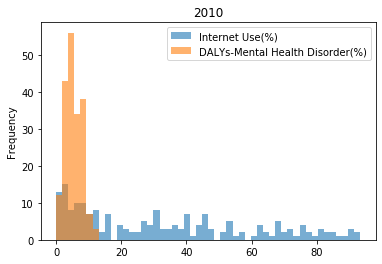

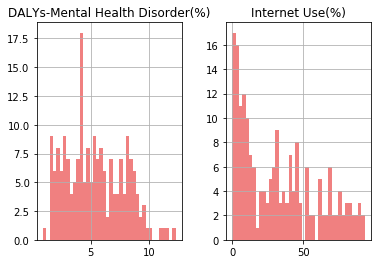


    
--------------------2015----------------------

    


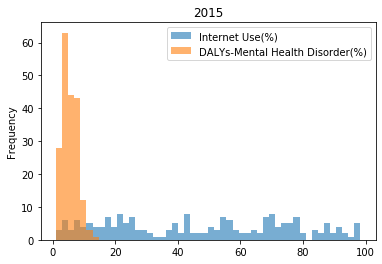

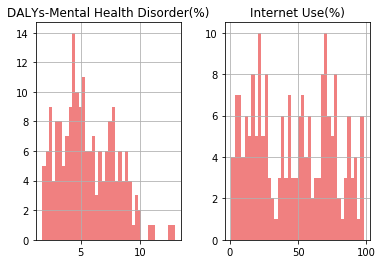

In [35]:
time_list = [1990,1995,2000,2005,2010,2015]

for time in time_list:
    print('''
    ''')
    print('--------------------' + str(time) + '----------------------')
    print('''
    ''')
    time_hist = dataset[dataset['Year']==time]
    time_hist[['Internet Use(%)','DALYs-Mental Health Disorder(%)']].plot(kind='hist',alpha = 0.6, bins=50, title = str(time))
    time_hist[['Internet Use(%)','DALYs-Mental Health Disorder(%)']].hist(bins=40,color = 'lightcoral')
    plt.show()


From this plot, in 1990 and 1995, the distribution range of mental health disorder value were much wider than Internet use value. But after entering the 20th century, the use of internet developed hugely along with the popularization of computer and mobile devices while the value of mental health disorder rate still distributed in a limited range. 

Though, comparing the figure of 1990 and 2015, the mental health disorders’ value-distribution range went wider slightly from ‘0 to 10’ to ‘0 to 15’.

So, we could say that the value-distributions of internet use and mental health disease __both have grown wider__ during the given time period.

---

#### 2. take all the countries in the database as sample, to see 

- __the correlations between the changing trends__ of these two vaiables in __different countries__.
- whether there exist __'ourliers'__.  

    - plot type : multiple
    - sample : all

In [36]:
countries = dataset.groupby('Country').size()
print(countries.index)

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=197)


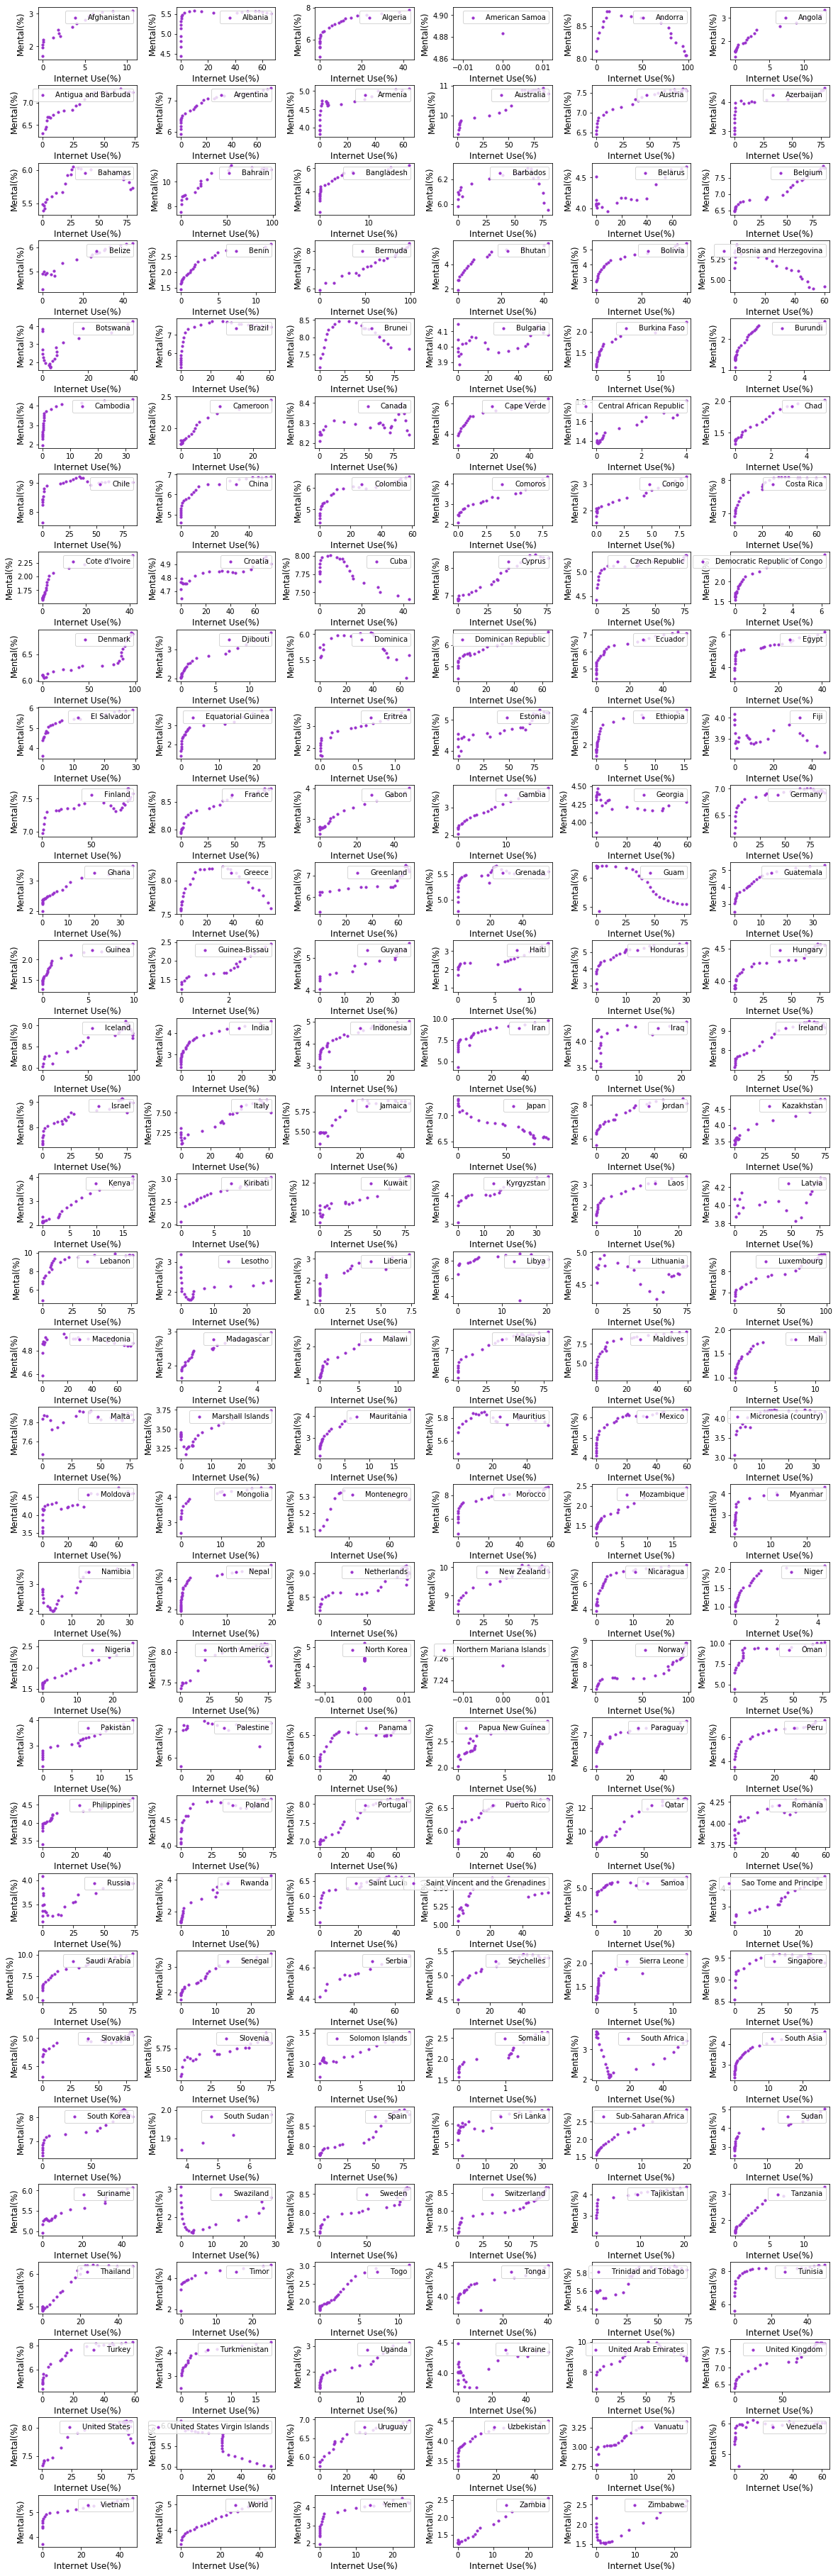

In [37]:
# scatter
fig = plt.figure(figsize=(20,80))
fig.subplots_adjust(hspace = 0.5, wspace = 0.4)

n = 1
for coun in countries.index:
    ax = fig.add_subplot(40,6,n)
    x = dataset[dataset['Country'] == coun]['Internet Use(%)']
    y = dataset[dataset['Country'] == coun]['DALYs-Mental Health Disorder(%)']
    
    ax.scatter(x , y , s = 10 ,c = 'darkorchid')
    ax.set_xlabel('Internet Use(%)',fontsize=12)
    ax.set_ylabel('Mental(%)',fontsize=12)
    ax.legend([coun], loc = 'upper right')
    
    n = n + 1
    
plt.show()

Most countries (175) show a __positive relation__ between Internet use and mental health disorder rate, while 22 of them perform ‘strangely’. 

9 countries show a n-turn, 6 show a u-turn, 3 show a m-turn ,3 show a downturn and 3 fluctuate hugely. The list is as follows:

In [39]:
outlier = pd.DataFrame.from_dict({
    'n-turn':'Andorra; Bahamas; Barbados; Brunei; Cuba; Dominica; Greece; Netherlands; United Arab Emriates,United Arab Emriates',
    'u-turn':'Zimbabwe; Swaziland; South Africa; Lithuania; Lesotho; Botswana',
    'm-turn':'Fiji; Guam',
    'downturn':'Basonia and Herzegovina; United States Virgin Islands; Japan',
    'fluctuate':'Canada; Latvia'
},orient='index')

outlier

,0
n-turn,Andorra; Bahamas; Barbados; Brunei; Cuba; Domi...
u-turn,Zimbabwe; Swaziland; South Africa; Lithuania; ...
m-turn,Fiji; Guam
downturn,Basonia and Herzegovina; United States Virgin ...
fluctuate,Canada; Latvia


So when considering the whole world, there is a __postive relation__ between the use of Internet and mental health disorder.

---

### 2.2.2 Further Exploration
If the postitive relation between the Internet use and mental health disorder really exists, why there are 'oueliers' showing different correlations?
__Or says what factors influence such correlation__.
Since the economy is always the first factor to be considered in most cases, __the first hypothesis__ is it is __a country's economic situation__ that affect the relationship between Internet use and mental health condition.

__The Question__:  whether such correlation (positive relation) different in developed and developing countries.

The changing trends of the mental health disorder cross developed and developing countries from 1990-2016.

- plot type : multiple 
- samples:
    - developed : United States, Japan, Germany
    - developing : China, Mexico，South Africa

In [40]:
developed = ['United States','Japan','Germany']
developing = ['Mexico','China','South Africa']

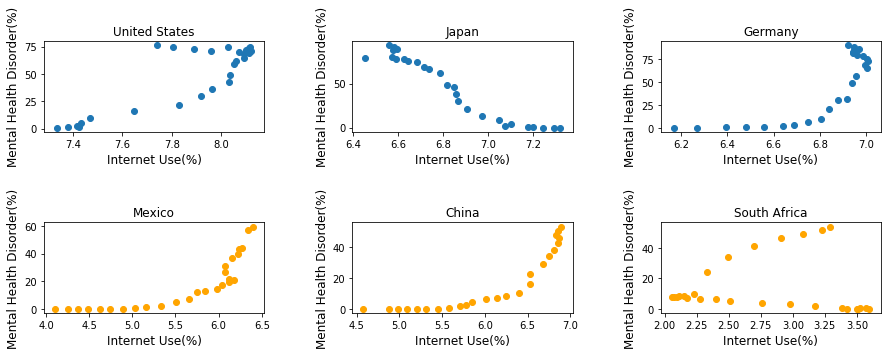

In [41]:
# scatter chart -- correlation
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace = 1, wspace = 0.4)

n = 1
for i in range(3):
    ax1 = fig.add_subplot(2,3,n)
    y = dataset[dataset['Country'] == developed[i]]['Internet Use(%)']
    x = dataset[dataset['Country'] == developed[i]]['DALYs-Mental Health Disorder(%)']
    
    ax1.set_title(developed[i])
    ax1.scatter(x , y)
    ax1.set_xlabel('Internet Use(%)',fontsize=12)
    ax1.set_ylabel('Mental Health Disorder(%)',fontsize=12)
    
    n = n + 1

n = 1
for i in range(3):
    ax2 = fig.add_subplot(2,3,n+3)
    y = dataset[dataset['Country'] == developing[i]]['Internet Use(%)']
    x = dataset[dataset['Country'] == developing[i]]['DALYs-Mental Health Disorder(%)']
    
    ax2.set_title(developing[i])
    ax2.scatter(x , y , c = 'orange')
    ax2.set_xlabel('Internet Use(%)',fontsize=12)
    ax2.set_ylabel('Mental Health Disorder(%)',fontsize=12)

    n = n + 1
    
plt.show()


Seen from the upper plot, there is no evident difference between developed part and developing part and there is even no consistent pattern between each part.

---

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


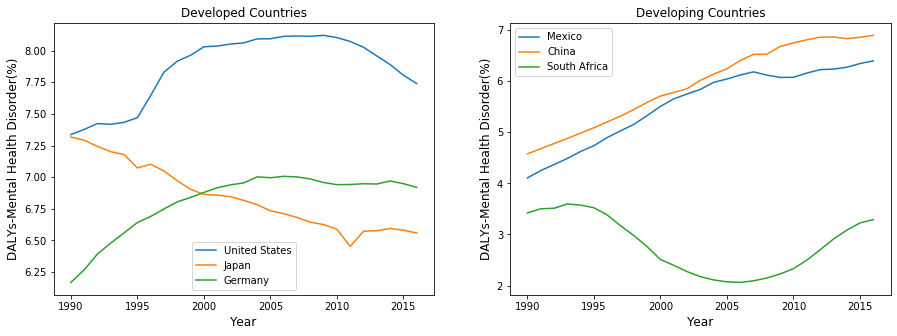

In [42]:
# line chart -- chaning trends
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.2)

for i in range(3):
    ax1 = fig.add_subplot(1,2,1)
    
    y = dataset[dataset['Country'] == developed[i]]['DALYs-Mental Health Disorder(%)']
    x = dataset[dataset['Country'] == developed[i]]['Year']
    
    ax1.set_title('Developed Countries')
    ax1.plot(x , y,label = developed[i])
    ax1.set_xlabel('Year',fontsize=12)
    ax1.set_ylabel('DALYs-Mental Health Disorder(%)',fontsize=12)
    ax1.legend()

for i in range(3):
    ax2 = fig.add_subplot(1,2,2)
    
    y = dataset[dataset['Country'] == developing[i]]['DALYs-Mental Health Disorder(%)']
    x = dataset[dataset['Country'] == developing[i]]['Year']
    
    ax2.set_title('Developing Countries')
    ax2.plot(x , y ,label = developing[i])
    ax2.set_xlabel('Year',fontsize=12)
    ax2.set_ylabel('DALYs-Mental Health Disorder(%)',fontsize=12)
    ax2.legend()
    
plt.show()

From the chart above which plots the changing trends of mental health disorder, we could see that there is __no exact pattern__ in neither developed nor developing part.  
In the developed part, both United States and Germany show a n-turn while the value of Japan went down graduately. And as for its developing counterpart, South Afirca shows a u-turn while the mental health disorder conditions in Mexico and China became graduately worse over time.

So, take both the scatter plot and line plot into consideration, __the economic factor might not affect the relationship between a country's Internet use and mental health condition__.

---


## 3 Limitations
1. the representitives of developed countries and developing countries are selected arbitrarily rather than randomly, so the result that the economic factor does not affect the correlation is not quite persuasive.
2. more factors other than economic factor need to be tested, like policy, region, demographic factors, etc.
3. case studies of 'outliers' are also indispensable.

For further analysis, line charts also have been drawn to see the each countries‘ changing trends of Internet use and of mental health disorder.

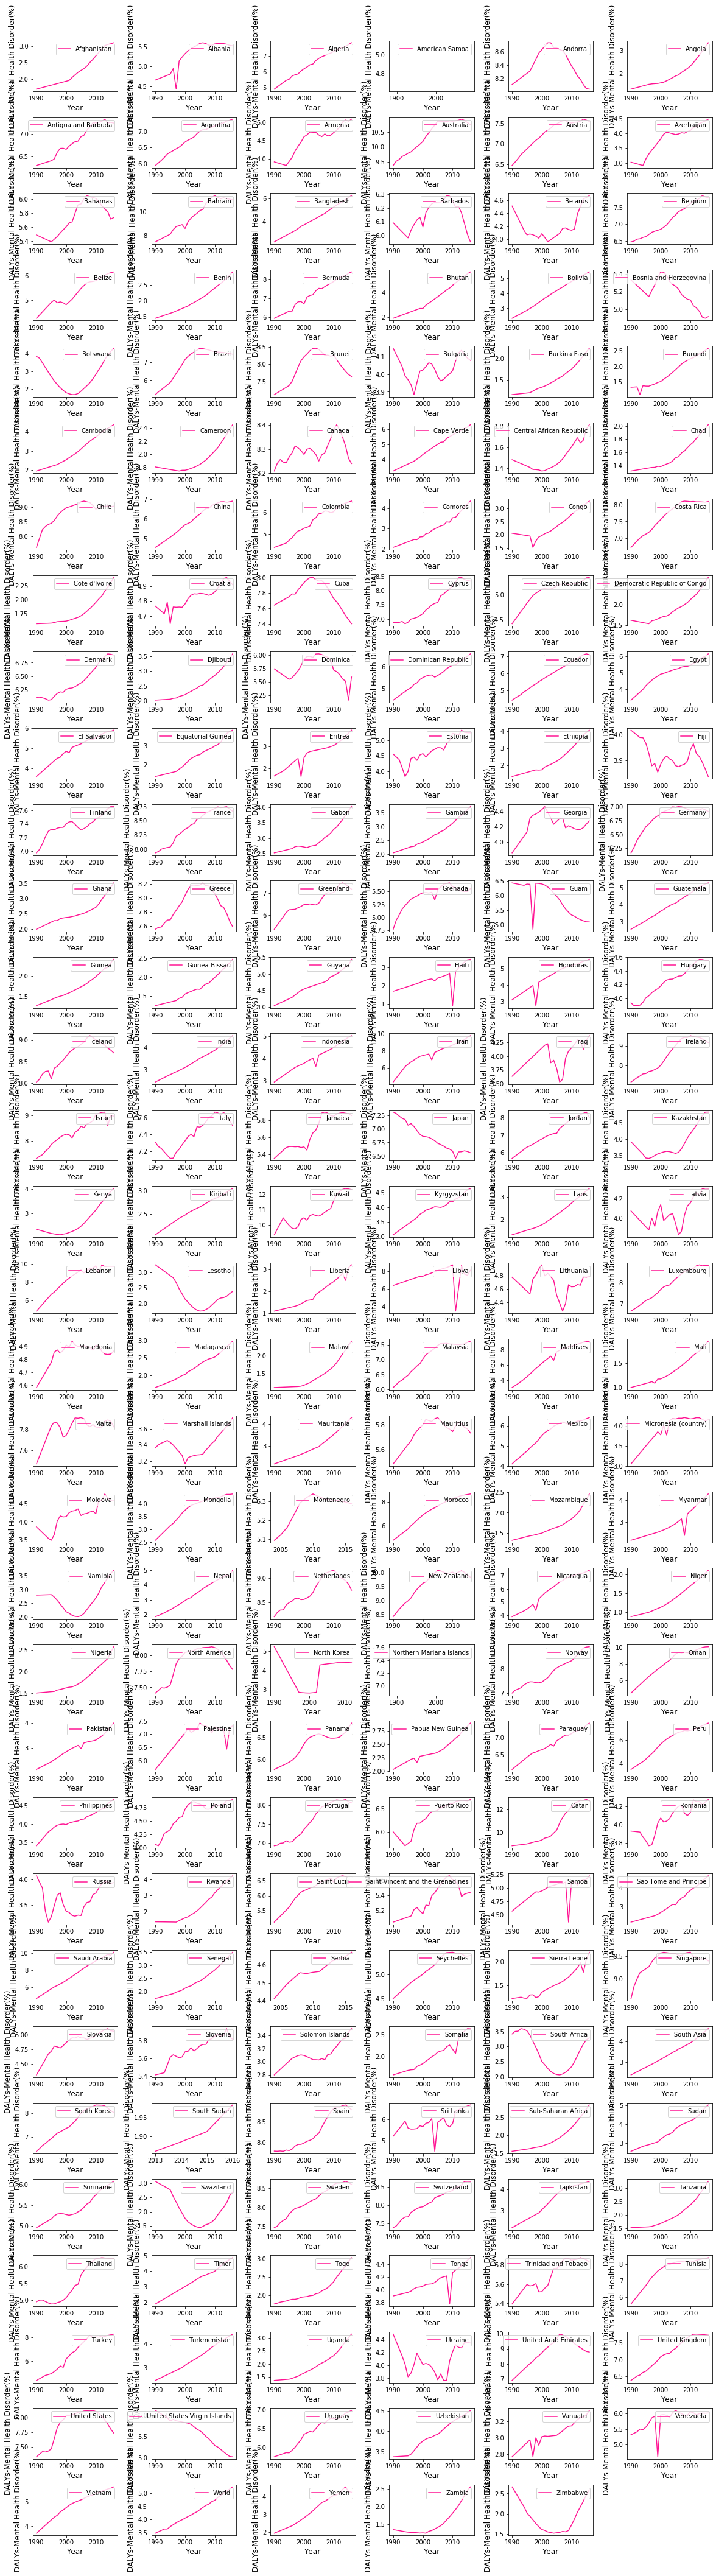

In [43]:
# mental health disorder
fig = plt.figure(figsize=(20,80))
fig.subplots_adjust(hspace = 0.5, wspace = 0.4)

n = 1
for coun in countries.index:
    ax = fig.add_subplot(35,6,n)
    x = dataset[dataset['Country'] == coun]['Year']
    y = dataset[dataset['Country'] == coun]['DALYs-Mental Health Disorder(%)']
    
    ax.plot(x , y , c = 'deeppink')
    ax.set_xlabel('Year',fontsize=12)
    ax.set_ylabel('DALYs-Mental Health Disorder(%)',fontsize=12)
    ax.legend([coun], loc = 'upper right')
    
    n = n + 1 
    
plt.show()

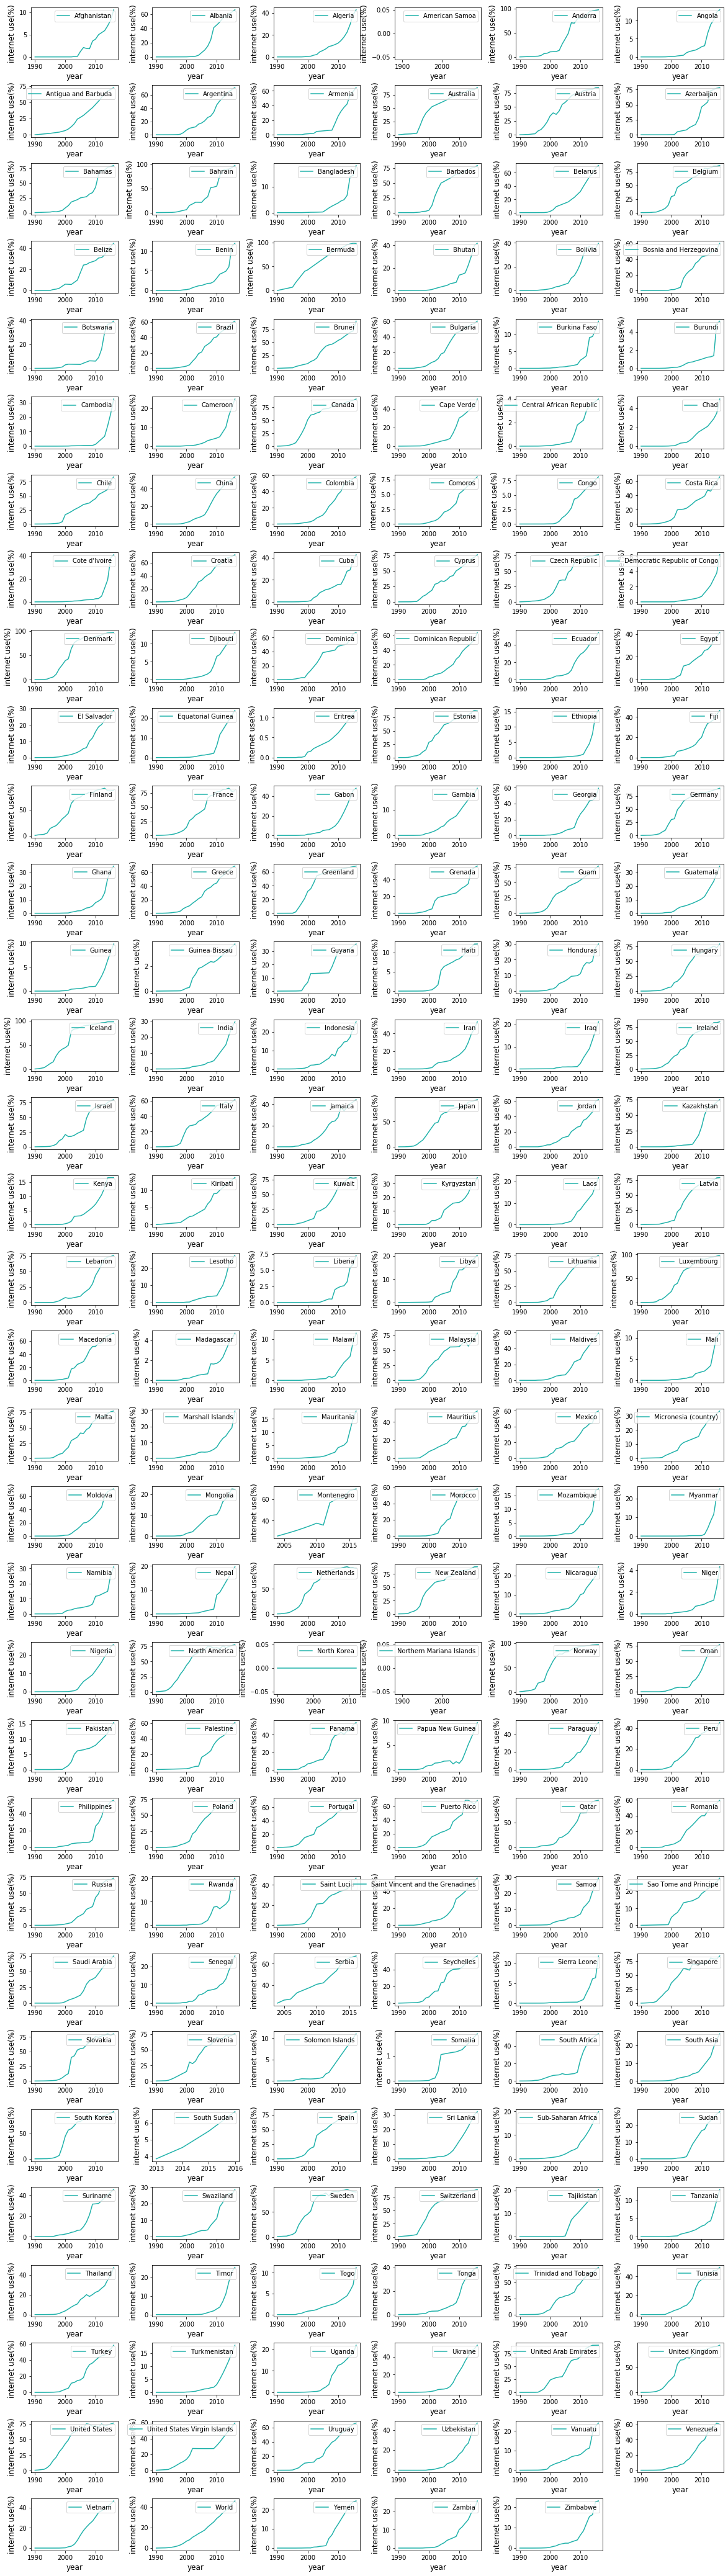

In [44]:
# internet use
fig = plt.figure(figsize=(20,80))
fig.subplots_adjust(hspace = 0.5, wspace = 0.4)

n = 1
for coun in countries.index:
    ax = fig.add_subplot(35,6,n)
    x = dataset[dataset['Country'] == coun]['Year']
    y = dataset[dataset['Country'] == coun]['Internet Use(%)']
    
    ax.plot(x , y , c = 'lightseagreen')
    ax.set_xlabel('year',fontsize=12)
    ax.set_ylabel('internet use(%)',fontsize=12)
    ax.legend([coun], loc = 'upper right')
    n = n + 1 
    
plt.show()